# WeatherPy
----
#### By: Tameka Kuar
#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = '../output_data/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed with the city name.


In [3]:
# Set url for API
url = 'http://api.openweathermap.org/data/2.5/weather?'

# Set units
units = 'imperial'

# Build partial query URL
query_url = f'{url}appid={weather_api_key}&units={units}&q='

# Lists to hold response from city weather data
cities_data = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = [] 

# Variable to count the number of weather records
record_count = 1


print('---------------------------------')
print('     Beginning Data Retrieval     ')
print('---------------------------------')


# Loop to perform a request for data on each city
for city in cities:
    
    # Create search query, make request and store in json
    weather_response = requests.get(query_url + city).json()
    
    # Add a one second interval between queries to stay within API query limits
    time.sleep(0.1)
    
    print(f'Processing Record {record_count} | {city}')
    
    # Try to grab the weather data if the city is available in the OpenWeatherMap API 
    try:
        
        lat.append(weather_response['coord']['lat'])
        lng.append(weather_response['coord']['lon'])
        max_temp.append(weather_response['main']['temp_max'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds']['all'])
        wind_speed.append(weather_response['wind']['speed'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt'])
        record_count += 1
        cities_data.append(city)
    
    # Handle exceptions for a city that is not available in the OpenWeatherMap API 
    except:
        
        print('Sorry this city was not found. Skipping...')
        pass


print('---------------------------------')
print('     Data Retrieval Complete     ')
print('---------------------------------')

---------------------------------
     Beginning Data Retrieval     
---------------------------------
Processing Record 1 | amderma
Sorry this city was not found. Skipping...
Processing Record 1 | meulaboh
Processing Record 2 | severo-kurilsk
Processing Record 3 | berlevag
Processing Record 4 | aguas formosas
Processing Record 5 | ushuaia
Processing Record 6 | taolanaro
Sorry this city was not found. Skipping...
Processing Record 6 | tsihombe
Sorry this city was not found. Skipping...
Processing Record 6 | chlorakas
Processing Record 7 | jamestown
Processing Record 8 | port lincoln
Processing Record 9 | mataura
Processing Record 10 | vaini
Processing Record 11 | new norfolk
Processing Record 12 | busselton
Processing Record 13 | yellowknife
Processing Record 14 | hermanus
Processing Record 15 | westport
Processing Record 16 | buraydah
Processing Record 17 | ahome
Processing Record 18 | mys shmidta
Sorry this city was not found. Skipping...
Processing Record 18 | punta arenas
Processin

Processing Record 207 | yaguachi
Processing Record 208 | khatanga
Processing Record 209 | singaparna
Processing Record 210 | cape town
Processing Record 211 | arkhara
Processing Record 212 | witbank
Processing Record 213 | belmonte
Processing Record 214 | pinheiro
Processing Record 215 | reinbek
Processing Record 216 | tafalla
Processing Record 217 | samusu
Sorry this city was not found. Skipping...
Processing Record 217 | eden
Processing Record 218 | okhotsk
Processing Record 219 | lompoc
Processing Record 220 | marcona
Sorry this city was not found. Skipping...
Processing Record 220 | alofi
Processing Record 221 | sao filipe
Processing Record 222 | ayan
Processing Record 223 | upernavik
Processing Record 224 | cairo
Processing Record 225 | grand-lahou
Processing Record 226 | uyemskiy
Processing Record 227 | hami
Processing Record 228 | kondagaon
Processing Record 229 | vila velha
Processing Record 230 | uyuni
Processing Record 231 | palmer
Processing Record 232 | tahoua
Processing Re

Processing Record 421 | gorom-gorom
Processing Record 422 | kutum
Processing Record 423 | port hedland
Processing Record 424 | bilma
Processing Record 425 | seidu
Processing Record 426 | champerico
Processing Record 427 | beni suef
Processing Record 428 | odienne
Processing Record 429 | gunjur
Processing Record 430 | arlit
Processing Record 431 | kataysk
Processing Record 432 | mogadishu
Processing Record 433 | teseney
Processing Record 434 | ondangwa
Processing Record 435 | indianola
Processing Record 436 | baraboo
Processing Record 437 | sechura
Processing Record 438 | nemuro
Processing Record 439 | matamba
Processing Record 440 | salina cruz
Processing Record 441 | adrar
Processing Record 442 | korla
Processing Record 443 | rudbar
Processing Record 444 | brigantine
Processing Record 445 | jurm
Processing Record 446 | praya
Processing Record 447 | katangli
Processing Record 448 | kieta
Processing Record 449 | sevilla
Processing Record 450 | dalbandin
Processing Record 451 | dalby
Pro

In [4]:
# Making sure all the lists have the same amount of data
print(len(cities_data))
print(len(lat))
print(len(lng))
print(len(max_temp))
print(len(humidity))
print(len(cloudiness))
print(len(wind_speed))
print(len(country))
print(len(date))

552
552
552
552
552
552
552
552
552


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a data frame for the raw cities' weather data
cities_weather_data = pd.DataFrame({'City': cities_data,
                                    'Lat': lat,
                                    'Lng': lng,
                                    'Max Temp': max_temp,
                                    'Humidity': humidity,
                                    'Cloudiness': cloudiness,
                                    'Wind Speed': wind_speed,
                                    'Country': country,
                                    'Date': date})

# Export data frame as acsv file
cities_weather_data.to_csv(output_data_file, header=True, index=False)

# Count the values in each column
cities_weather_data.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [6]:
# Displays the data frame
cities_weather_data.head(15)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,meulaboh,4.14,96.13,77.27,87,80,4.23,ID,1593541682
1,severo-kurilsk,50.68,156.12,46.02,87,81,16.87,RU,1593541682
2,berlevag,70.86,29.09,41.00,100,75,24.16,NO,1593541683
3,aguas formosas,-17.08,-40.94,68.88,90,100,3.74,BR,1593541683
4,ushuaia,-54.80,-68.30,32.00,92,1,1.95,AR,1593541589
5,chlorakas,34.80,32.41,80.01,88,0,8.05,CY,1593541684
6,jamestown,42.10,-79.24,78.01,60,75,10.29,US,1593541684
7,port lincoln,-34.73,135.87,54.34,81,0,16.67,AU,1593541684
8,mataura,-46.19,168.86,39.00,83,68,3.00,NZ,1593541685
9,vaini,-21.20,-175.20,71.60,94,75,8.05,TO,1593541685


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 
* there were no instances where humidity was greater than 100% in my data set that I worked with.

In [7]:
#  Get the indices of cities that have humidity over 100%.
cities_weather_data.loc[cities_weather_data['Humidity'] > 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [10]:
# Get the data for lat, max temp, humidity, cloudiness, and wind speed for cities from the data frame 
city_lat = cities_weather_data["Lat"]
city_max_temps = cities_weather_data["Max Temp"]
city_humidity = cities_weather_data["Humidity"]
city_clouds = cities_weather_data["Cloudiness"]
city_wind_speed = cities_weather_data["Wind Speed"]

# Convert date into a readable format to use for plots
ts = time.gmtime(cities_weather_data['Date'][0])
date = time.strftime('%x', ts)

## Latitude vs. Temperature Plot

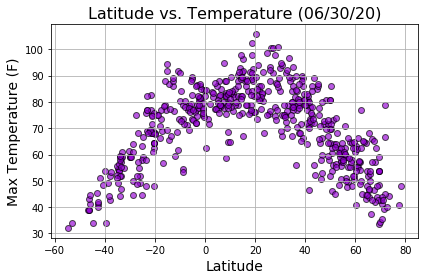

In [11]:
# Create a scatter plot based on lat and max temp
plt.scatter(city_lat, city_max_temps, facecolor='darkviolet',
           edgecolor='black', marker='o', alpha=0.65)

# Create a title and labels for x and y axis
plt.title(f'Latitude vs. Temperature ({date})', fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Max Temperature (F)', fontsize=14)
plt.grid(True)

# Save and show the graph
plt.tight_layout()
plt.savefig('../output_data/lat_vs_temp.png')
plt.show()

* Looking at this scatter plot, it appears that for today's weather data the cities that are between 0 degrees latitude and 40 degrees latitude have higher max temperatures.

## Latitude vs. Humidity Plot

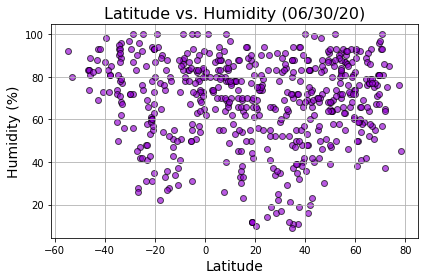

In [12]:
# Create a scatter plot based on lat and humidity
plt.scatter(city_lat, city_humidity, facecolor='darkviolet',
           edgecolor='black', marker='o', alpha=0.65)

# Create a title and labels for x and y axis
plt.title(f'Latitude vs. Humidity ({date})', fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Humidity (%)', fontsize=14)
plt.grid(True)

# Save and show the graph
plt.tight_layout()
plt.savefig('../output_data/lat_vs_humid.png')
plt.show()

* Looking at this scatter plot, there does not seem to be a strong correlation between the latitude of the city and today's humidity. Most of the data points are fairly high.

## Latitude vs. Cloudiness Plot

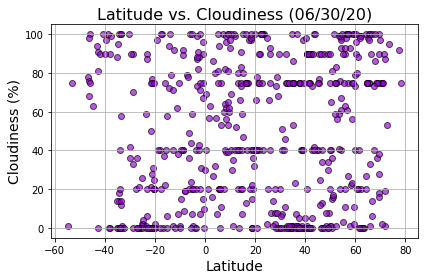

In [13]:
# Create a scatter plot based on lat and cloudiness
plt.scatter(city_lat, city_clouds, facecolor='darkviolet',
           edgecolor='black', marker='o', alpha=0.65)

# Create a title and labels for x and y axis
plt.title(f'Latitude vs. Cloudiness ({date})', fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Cloudiness (%)', fontsize=14)
plt.grid(True)

# Save and show the graph
plt.tight_layout()
plt.savefig('../output_data/lat_vs_cloud.png')
plt.show()

* Looking at this scatter plot, there does not seem to be a strong correlation between the latitude of the city and today's cloudiness. 

## Latitude vs. Wind Speed Plot

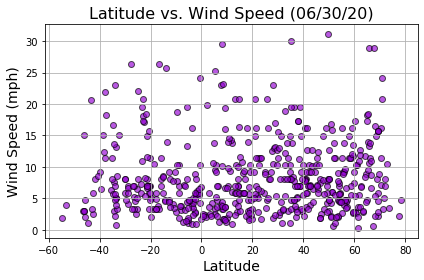

In [14]:
# Create a scatter plot based on lat and wind speed
plt.scatter(city_lat, city_wind_speed, facecolor='darkviolet',
           edgecolor="black", marker="o", alpha=0.65)

# Create a title and labels for x and y axis
plt.title(f'Latitude vs. Wind Speed ({date})', fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Wind Speed (mph)', fontsize=14)
plt.grid(True)

# Save and show the graph
plt.tight_layout()
plt.savefig('../output_data/lat_vs_wind.png')
plt.show()

* Looking at this scatter plot, it appears that the wind speed in each city in today's data is fairly low

## Linear Regression

In [15]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regress_plot(x_values, y_values, x_label, y_label, position, name):
    
    # Perform a linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Print the correlation coefficient
    print(f'The correlation coefficient is: {rvalue}')
    
    # Print r-squared value
    print(f'The r-squared is: {rvalue**2}')
    
    # Create equation of line to calculate predicted 
    regress_values = x_values * slope + intercept
    line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
    
    # Create a scatter plot
    plt.scatter(x_values, y_values, facecolor='darkviolet',
           edgecolor='black', marker='o', alpha=0.65)
    
    # Add the linear regression equation and line to plot on top of the scatter plot
    plt.plot(x_values, regress_values, color='darkturquoise')
    plt.annotate(line_eq, position, fontsize=15, color='darkturquoise')
    
    # Create a title and labels for x and y axis
    plt.title(name)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Save and show the graph
    plt.tight_layout()
    plt.savefig(f'../output_data/{name}_linear_regress.png')
    plt.show()

In [16]:
# Create Northern and Southern Hemisphere DataFrames
# the equator is included in the northern hemisphere data frame
northern_hemisphere = cities_weather_data.loc[cities_weather_data['Lat'] >= 0]
northern_hemisphere = northern_hemisphere.reset_index().drop(columns='index')
# northern_hemisphere

southern_hemisphere = cities_weather_data.loc[cities_weather_data['Lat'] < 0]
southern_hemisphere = southern_hemisphere.reset_index().drop(columns='index')
# southern_hemisphere


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient is: -0.7467842465994918
The r-squared is: 0.5576867109691707


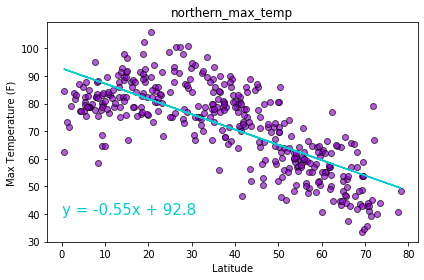

In [17]:
linear_regress_plot(x_values=northern_hemisphere['Lat'], y_values=northern_hemisphere['Max Temp'], 
                    x_label='Latitude', y_label='Max Temperature (F)', position=(0,40), name='northern_max_temp')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient is: 0.8394463215894347
The r-squared is: 0.7046701268300326


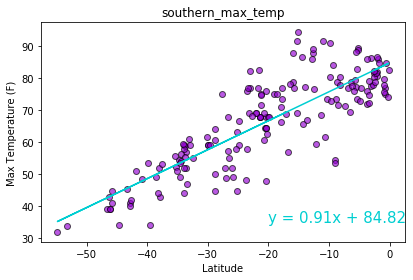

In [18]:
linear_regress_plot(x_values=southern_hemisphere['Lat'], y_values=southern_hemisphere['Max Temp'], 
                    x_label='Latitude', y_label='Max Temperature (F)', position=(-20,35), name='southern_max_temp')

* Looking at the cities in the Northern Hemishpere and Southern Hemisphere and their max temperatures versus their latitude, it appears that the closer the city is to the equator, the higher its max temperature is. This makes sense since the equator gets the most sunlight. 
* The Northern Hemisphere linear regression for max temperatures versus latitude has a strong negative correlation, which suggests that the closer you get to the the north pole from equator, the lower the max temperature is.
* The Southern Hemisphere linear regression for max temperatures versus latitude has a strong positive correlation, which suggests that the closer you get to the equator from the south pole, the higher the max temperature is.
* The results from these linear regressions are expected. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient is: 0.09434344284270936
The r-squared is: 0.008900685207415568


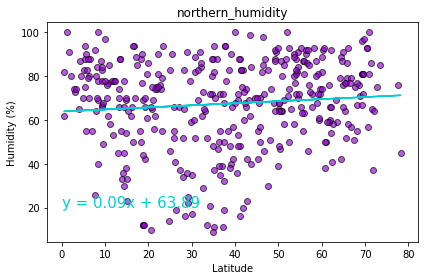

In [19]:
linear_regress_plot(x_values=northern_hemisphere['Lat'], y_values=northern_hemisphere['Humidity'], 
                    x_label='Latitude', y_label='Humidity (%)', position=(0,20), name='northern_humidity')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient is: -0.15613276462146022
The r-squared is: 0.024377440188340302


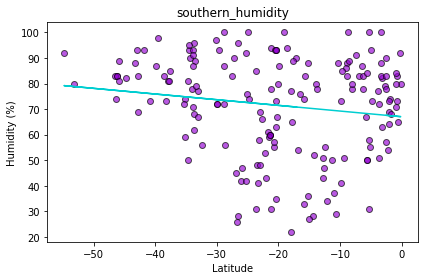

In [20]:
linear_regress_plot(x_values=southern_hemisphere['Lat'], y_values=southern_hemisphere['Humidity'], 
                    x_label='Latitude', y_label='Humidity (%)', position=(-55,15), name='southern_humidity')

* There appears to be no correlation between latitudes and humidity in both the Northern and Southern Hemispheres.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient is: 0.044646522603398034
The r-squared is: 0.0019933119805757315


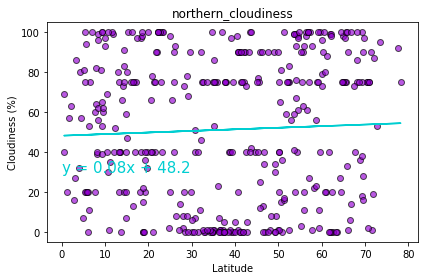

In [21]:
linear_regress_plot(x_values=northern_hemisphere['Lat'], y_values=northern_hemisphere['Cloudiness'], 
                    x_label='Latitude', y_label='Cloudiness (%)', position=(0,30), name='northern_cloudiness')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient is: -0.05303867659681741
The r-squared is: 0.0028131012151417865


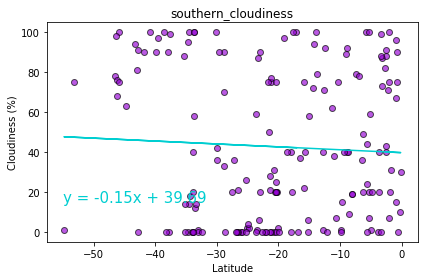

In [22]:
linear_regress_plot(x_values=southern_hemisphere['Lat'], y_values=southern_hemisphere['Cloudiness'], 
                    x_label='Latitude', y_label='Cloudiness (%)', position=(-55,15), name='southern_cloudiness')

* There appears to be no correlation between latitudes and cloudiness in both the Northern and Southern Hemispheres.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient is: 0.06972755853927405
The r-squared is: 0.004861932419847889


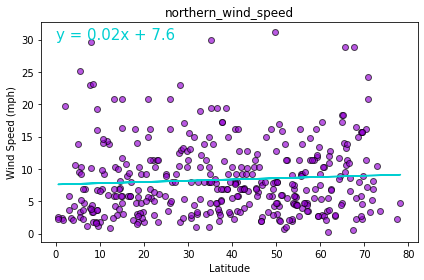

In [23]:
linear_regress_plot(x_values=northern_hemisphere['Lat'], y_values=northern_hemisphere['Wind Speed'], 
                    x_label='Latitude', y_label='Wind Speed (mph)', position=(0,30), name='northern_wind_speed')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient is: -0.1129352944563325
The r-squared is: 0.012754380733938527


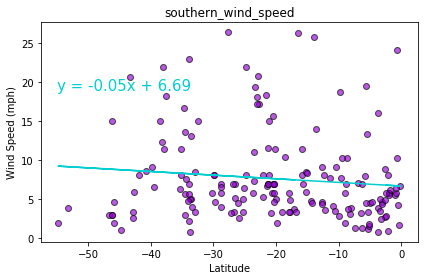

In [24]:
linear_regress_plot(x_values=southern_hemisphere['Lat'], y_values=southern_hemisphere['Wind Speed'], 
                    x_label='Latitude', y_label='Wind Speed (mph)', position=(-55,19), name='southern_wind_speed')

* There appears to be no correlation between latitudes and wind speeds in both the Northern and Southern Hemispheres.
* However, in the Northern Hemisphere, it does appear that the cities at higher latitudes have slightly higher wind speeds.